# Hotel Booking Demand

Sumber data hotel_booki_demand.CSV Purwadhika capstone project

**Contents**

1. Bussiness Problem Understanding
1. Data Understanding
1. Data Preprocessing
1. Modeling
1. Conclusion
1. Recommendation 

# Business Problem Understanding

**Context**

Industri perhotelan secara luas bergantung pada manajemen yang efisien terhadap permintaan pemesanan untuk memaksimalkan pendapatan dan meminimalkan risiko ketidak-terpenuhan kamar yang disebabkan karena pembatalan pesanan kamar. Dalam lingkungan bisnis yang kompetitif, pemahaman yang mendalam tentang perilaku pelanggan saat melakukan pemesanan hotel untuk pengambilan keputusan yang tepat dalam menentukan strategi perencanaan operasional

**Problem Statement**

1. Menentukan strategi yang tepat untuk menghandle pembatalan pesanan 
  
2. Memahami pola pembatalan pemesanan dan faktor-faktor yang mempengaruhinya. Tujuannya adalah untuk mengurangi risiko kehilangan pendapatan akibat pembatalan dan mengembangkan kebijakan pembatalan yang lebih efektif.

3. Memberikan insight dan rekomendasi kepada manajemen hotel berdasarakan temuan model, seperti startegi untuk mengurangi pembatalan dan meningkatkan pengalaman pelanggan


**Goals**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki sebuah model yang memiliki kemampuan untuk memprediksi kemungkinan customer akan membatalkan pesanan hotelnya atau tidak, sehingga dapat memfokuskan strategi bisnis yang dapat digunakan untuk pengambilan keputusan dalam menentukkan strategi perencanaan operasional Terutama saat High seasson berlangsung.

Dan juga, perusahaan ingin mengetahui faktor/variabel apa yang membuat seorang customer akan membatalkan pesanan mereka atau tidak (costumer behaviour), sehingga mereka dapat membuat rencana yang lebih baik untuk perusahaan.


# Limmittation

Berdasarkan datanya Ml learning nantinya hanya akan bekerja pada batas tertentu

* Ml di rekomendasikan untuk hotel yang memiliki multilevel room
* Pesanan yang di pesan dibawah satu tahun(365 hari berdasarkan Leadtime)
* Pesanan Dengan ADR di bawah 5000 Local Currency
* Pesanan di bawah <= 6 orang
* Pesanan dengan total Stay di bawah 40 hari

**Analytic Approach**

Selanjutnya, kita akan menganalisis data untuk menemukan faktor/variable apa yang mempengaruhi seorang customer akan membatalkan pesanannya atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas customer akan membatalkan pesanannya tersebut atau tidak.

**Metric Evaluation**

1. Type 1 error : False Positive

* False Positive ketika model memprediksi cancel ternyata book
* Konsekuensi : Terjadi Over Capasity dari kamar hotel, sehingga kemungkinan hotel harus melakukan upgrade ke kamar yang lebih tinggi dan available.

2. Type 2 error False Negative

* False Negative ketika model memprediksi booking ternyata cancel.
* Konsekuensinya : kita akan kehilangan pelanggan tanpa sempat mengantisipasinya,0 kemungkinan * akan ada kamar yang kosong karena tidak di antisipasi oleh OverBooking. 



Berdasarkan Konsekuensinya, maka kita berusaha sebaik mungkin untuk Menghandle Kapasitas Kamar dari strategi Overbook. 

**Data UnderStanding**

Dataset source : (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Hotal | Object | Nama hotel |
| is_canceled | Integer | Apakah pemesanan dibatalkan atau tidak (0 untuk tidak dibatalkan dan 1 untuk dibatalkan) |
| lead_time | Integer | waktu (dalam hari) antara transaksi pemesanan dan kedatangan aktual |
| arrival_date_year | Integer | Tahun kedatangan |
| arrival_date_month | Object | Bulan kedatangan |
| arrival_date_week_number | Integer | Nomor minggu dari tanggal kedatangan |
| arrival_date_day_of_month | Integer | Hari di bulan tanggal kedatangan |
| stays_in_weekend_nights | Integer | Jumlah malam akhir pekan yang dihabiskan di hotel |
| stays_in_week_nights	 | Integer | Jumlah malam hari yang dihabiskan di hotel |
| adults | Integer | Jumlah orang dewasa dalam catatan pemesanan tunggal |
| children | Float | Jumlah anak dalam satu catatan pemesanan |
| babies | Integer | Jumlah bayi dalam satu catatan pemesanan |
| meal | Object | Jenis makanan yang dipilih |
| country | Object | Negara asal pelanggan (sebagaimana disebutkan oleh mereka) |
| market_segment | Object | Segmen apa melalui pemesanan yang dibuat dan untuk tujuan apa |
| distribution_channel | Object | Melalui media mana pemesanan dilakukan |
| is_repeated_guest | Integer | Apakah pelanggan pernah melakukan pemesanan sebelumnya (0 untuk No dan 1 untuk Ya) |
| previous_cancellations | Integer | Jumlah pemesanan yang dibatalkan sebelumnya. |
| previous_bookings_not_canceled | Integer | Jumlah pemesanan sebelumnya yang tidak dibatalkan |
| reserved_room_type | Object | Tipe kamar yang dipesan oleh pelanggan |
| assigned_room_type | Object | Tipe kamar yang ditetapkan ke pelanggan |
| booking_changes | Integer | Jumlah perubahan pemesanan yang dilakukan oleh pelanggan |
| deposit_type | Object | Jenis deposit pada saat melakukan pemesanan (No deposit/ Refundable/ No refund) |
| agent | Float | ID agen untuk pemesanan |
| company | Float | ID perusahaan yang melakukan pemesanan |
| days_in_waiting_list | Integer | Jumlah hari dalam daftar tunggu |
| customer_type | Object | Jenis pelanggan (Sementara, Grup, dll.) |
| adr | float | Tarif rata-rata harian. |
| required_car_parking_spaces | Integer | Jumlah parkir mobil yang ditanyakan dalam pemesanan |
| total_of_special_requests | Integer | jumlah total permintaan khusus |
| reservation_status | object | Apakah pelanggan sudah check out atau membatalkan, atau tidak muncul |
| reservation_status_date | object | Tanggal pembuatan status reservasi |



In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

# Imbalance Dataset
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Save Model
import joblib

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("hotel_bookings.csv")
display(df.head(), df.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Berdarsarkan informasi sederhana yang kita dapat terdapat 32 kolom pada dataset yang terdiri dari tipe data object serta integer.

# Data Cleaning

In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,2,"[City Hotel, Resort Hotel]"
1,is_canceled,int64,0,0.00,2,"[1, 0]"
2,lead_time,int64,0,0.00,479,"[3, 218]"
3,arrival_date_year,int64,0,0.00,3,"[2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[November, October]"
5,arrival_date_week_number,int64,0,0.00,53,"[17, 24]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[23, 2]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[16, 19]"
8,stays_in_week_nights,int64,0,0.00,35,"[2, 41]"
9,adults,int64,0,0.00,14,"[1, 40]"


Tabel di atas memperlihatkan bahwa terdapat data kosong pada kolom children,country, agent dan Company, pada kolom company bahkan data kosong terdapat sebanyak 112.593 baris yang data tersebut mencangkup 94,3% keseluruhan data dan juga agent 16.340 baris yang data tersebut mencangkup 13.6% keseluruhan data.

In [5]:
df.shape

(119390, 32)

Jumlah keseluruhan baris adalah 119.390 baris & 32 kolom

# 1. Menghandle untuk duplicate data

In [6]:
df[df.duplicated()].shape

(31994, 32)

Terdapat 31.994 data duplicate yang terdapat di dalam dataset, duplicate data yang ada pada dataset ini dapat mempengaruhi hasil analisis dari EDA maka perlu kita drop duplicate datanya.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(87396, 32)

Hasil setelah  proses drop duplicate dataset, setelah data duplicate di drop kita memiliki 87.396 baris data

# 2. Menghandle untuk missing Value

In [9]:
df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Setelah kita handling untuk duplicate datanya kita mendapatkan hasil terbaru data kosong/null pada dataset, karena kolom Company dan agent memiliki banyak nomor perusahaan dan nomor agen sebagai datanya. Mungkin ada beberapa kasus ketika pelanggan tidak memesan hotel melalui agen atau perusahaan mana pun. Jadi dalam hal ini nilai bisa menjadi nol di bawah kolom ini. \
Kami akan mengganti nilai null dengan 0 di kolom ini.

In [10]:
df[['company','agent']] = df[['company','agent']].fillna(0)

Masih Terdapat missing Value Di children, mari kita cek terlebih dahulu.

In [11]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Terdapat value 0 di dalam kolom children, artinya pada saat pemesanan banyak dari costumer yang tidak membawa anak - anak sehingga di valuenya 0, missing value nan kemungkinan besar merupakan costumer yang tidak membawa anak2 juga sehingga input anak - anak tidak di masukan yang seharusnya di isi null maka kita akan mengganti kolom yang kosong dengan nilai 0.

In [12]:
df[['children']] = df[['children']].fillna(0)

Selanjutnya kolom negara, kolom ini mewakili negara dari masing - masing costumner, nilai null sebesar 13,69% atau 13.7% lumyan besar untuk di hapus sehingga kita akan menggunakan cara kedua dengan tetap mempertahankan barisnya dan mengganti nilai null dengan others

In [13]:
df['country'].fillna('others', inplace = True)

Mengecek kembali nilai null yang tersebar

In [14]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,479,"[50, 341]"
3,arrival_date_year,int64,0,0.0,3,"[2017, 2015]"
4,arrival_date_month,object,0,0.0,12,"[January, February]"
5,arrival_date_week_number,int64,0,0.0,53,"[46, 30]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[13, 25]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[10, 9]"
8,stays_in_week_nights,int64,0,0.0,35,"[5, 14]"
9,adults,int64,0,0.0,14,"[27, 1]"


Nilai null sudah di handel mari kita cek jika terdapat anomali yang lain

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


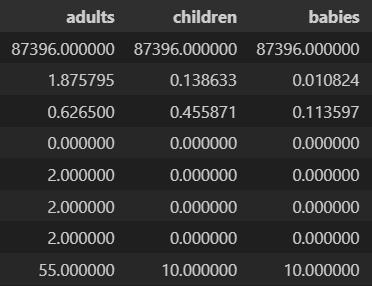

1. Dari table di atas kita mengetahui bahwa terdapat transaksi dimana pesanan adult children hingga babies kosong, hal ini tidak mungkin terjadi karena tidak mungkin booking di lakukan jika yang membooking tidak ada terutama jika nilai pada kolom adultsnya kosong, biasanya kebijakan yang ada tidak memperbolehkan anak - anak di bawah umur untuk melakukan check-in tanpa di dampingi orang dewasa.

1. Mengutip dari https://parador-hotels.com/blog/apakah-umur-17-tahun-bisa-check-in-hotel 
Seseorang harus setidaknya cukup umur untuk dapat malakukan reservasi hotel, sehingga atas dasar hal tersebut jika terdapat kolom adult yang kosong maka bisa di asumsikan data tersebut tidak valid

1. Berdasaran hal tersebut kita akan menghapus pesanan yang memiliki nilai adult =  0.

In [16]:
df[df['adults']== 0].shape

(385, 32)

Terdapat setidak 385 baris data yang memiliki nilai adult = 0 maka kita akan menghapusnya

In [17]:
df.drop(df[df['adults'] == 0].index, inplace = True)

In [18]:
df[df['adults']== 0].shape

(0, 32)

kolom adult yang bernilai 0 sudah di atasi

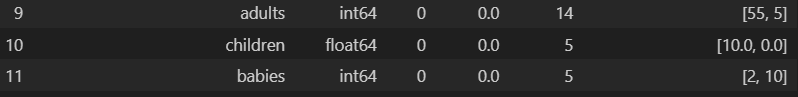

dari table di atas kita dapat melihat bahwa kolom children benrilai float sedangkan yang lain adalah integer, seharusnya tidak ada nilai float untuk kategori costumer dewasa, anak - anak maupun balita maka bisa kita rubah kolom tersebut ke dalam integer

In [19]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [20]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,479,"[273, 521]"
3,arrival_date_year,int64,0,0.0,3,"[2016, 2015]"
4,arrival_date_month,object,0,0.0,12,"[March, February]"
5,arrival_date_week_number,int64,0,0.0,53,"[51, 15]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[12, 17]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[6, 1]"
8,stays_in_week_nights,int64,0,0.0,33,"[1, 34]"
9,adults,int64,0,0.0,13,"[2, 27]"


Memastikan format data type reservation ke dalam format yang di inginkan

In [21]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

# 3. Menginput kolom total stay dan total pengunjung

In [22]:
df['company_or_personal'] = np.where(df['company'] != 0, 1, 0)

df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

df['total_people'] = df['adults']+df['children']+df['babies']

In [23]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,479,"[371, 70]"
3,arrival_date_year,int64,0,0.0,3,"[2017, 2015]"
4,arrival_date_month,object,0,0.0,12,"[November, May]"
5,arrival_date_week_number,int64,0,0.0,53,"[20, 39]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[16, 22]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[14, 7]"
8,stays_in_week_nights,int64,0,0.0,33,"[8, 21]"
9,adults,int64,0,0.0,13,"[20, 6]"


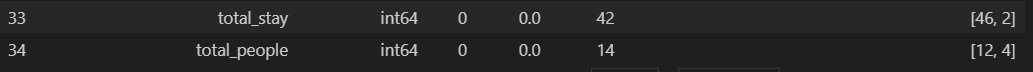

Kalau kita lihat ternyata pada kolom total people yang merupakan total dari kolom adult, children dan babies terdapat jumlah anomali mari kita cek kembali

In [24]:
df['total_people'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55, 20,  6, 10],
      dtype=int64)

dapat kita lihat terdapat data anomali dimana pemesanan tidak wajar untuk sebuah kamar hotel ataupun resort hotel dimana tidak mungkin rasanya jika seseorang memesan kamar lebih dari 10 orang untuk mengatasinya akan kita handle untuk menghapus data yang miliki total people di atas 10 orang

In [25]:
df.drop(df[df['adults'] + df['children'] + df['babies'] > 6].index, inplace = True)

In [26]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[1, 0]"
2,lead_time,int64,0,0.0,479,"[216, 307]"
3,arrival_date_year,int64,0,0.0,3,"[2015, 2017]"
4,arrival_date_month,object,0,0.0,12,"[September, December]"
5,arrival_date_week_number,int64,0,0.0,53,"[29, 49]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[31, 13]"
7,stays_in_weekend_nights,int64,0,0.0,17,"[7, 2]"
8,stays_in_week_nights,int64,0,0.0,33,"[18, 32]"
9,adults,int64,0,0.0,6,"[1, 6]"


In [27]:
df['total_people'].unique()

array([2, 1, 3, 4, 5, 6], dtype=int64)

In [28]:
df.shape

(86995, 35)

# EDA

In [29]:
round(df['is_canceled'].value_counts()/df.shape[0]* 100,2)

is_canceled
0    72.51
1    27.49
Name: count, dtype: float64

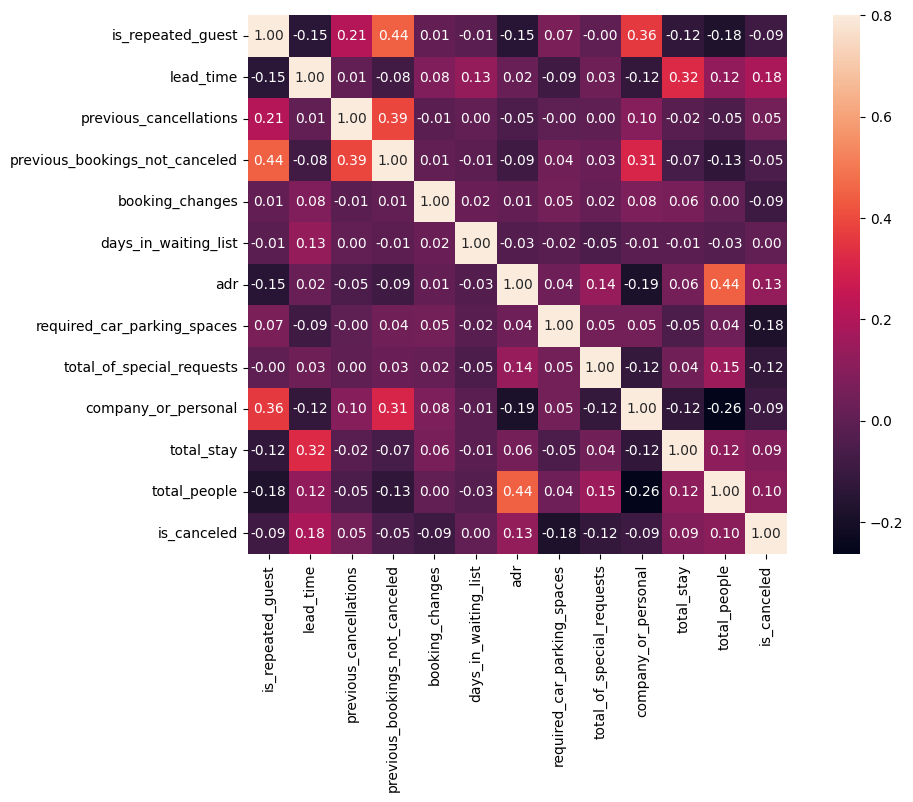

In [30]:
correlationdf = df[['is_repeated_guest','lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','company_or_personal','total_stay','total_people','is_canceled']]
corrmat = correlationdf.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

In [31]:
corr_matrix = correlationdf.corr()

# Unstack correlation matrix
corr_values = corr_matrix.unstack()

# Create a DataFrame from the unstacked correlation matrix
corr_df = pd.DataFrame(corr_values, columns=['correlation'])

# Reset the index to create two columns for feature1 and feature2
corr_df = corr_df.reset_index()
corr_df = corr_df.rename(columns={'level_0':'feature1','level_1':'feature2'})

# Add absolute correlation values
corr_df['abs_correlation'] = abs(corr_df['correlation'])

# Sort the correlation values
corr_df = corr_df.sort_values(by='abs_correlation', ascending=False)
corr_df = corr_df[corr_df['feature1']!=corr_df['feature2']]
corr_df = corr_df[corr_df['feature1']=='is_canceled']
corr_df = corr_df.reset_index(drop=True)
corr_df

,feature1,feature2,correlation,abs_correlation
0,is_canceled,required_car_parking_spaces,-0.184538,0.184538
1,is_canceled,lead_time,0.183668,0.183668
2,is_canceled,adr,0.128150,0.128150
3,is_canceled,total_of_special_requests,-0.120924,0.120924
4,is_canceled,total_people,0.102360,0.102360
5,is_canceled,company_or_personal,-0.094304,0.094304
6,is_canceled,booking_changes,-0.093184,0.093184
7,is_canceled,is_repeated_guest,-0.088743,0.088743
8,is_canceled,total_stay,0.085138,0.085138
9,is_canceled,previous_bookings_not_canceled,-0.052182,0.052182


berdasarkan korelasi dengan kolom is cancelednya terdapat peringkat yang menjelaskan seberapa besar kolom tersebut memiliki korelasi yang menentukan seseorang pesanan tersebut akan di cancel atau tidak mari analisis untuk melihat apakah hal tersebut benar.

# 1. **Analisis Pengaruh Request Parkir Terhadap Tingkat Cancellation Penyewa**

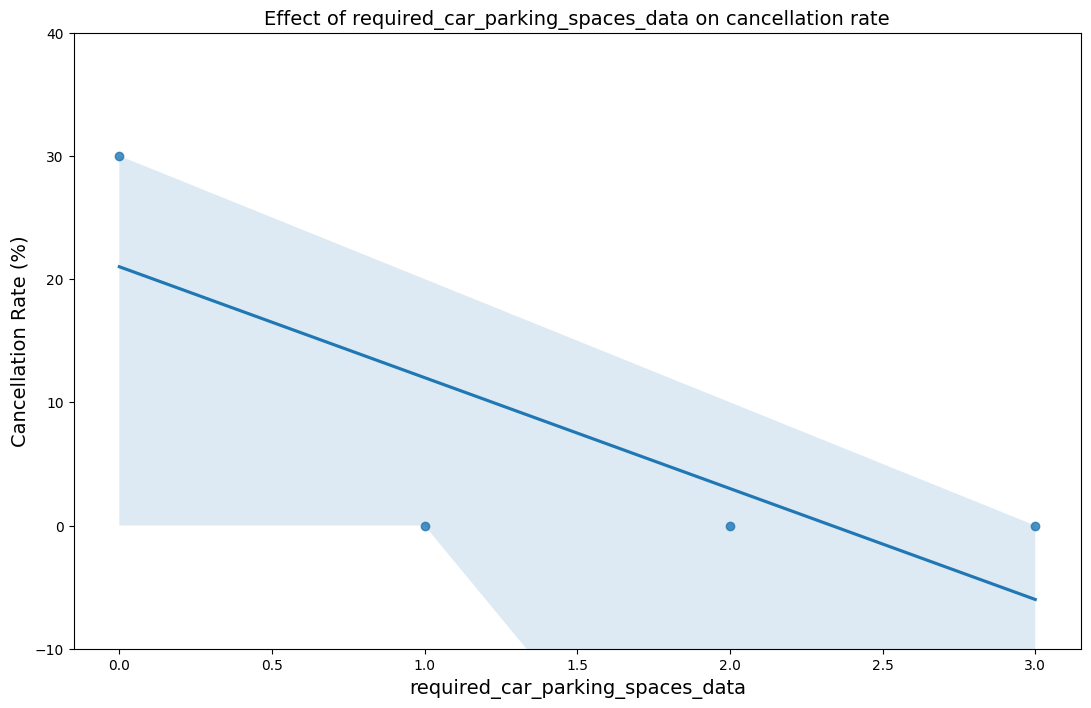

In [32]:
df.drop(df[df['required_car_parking_spaces'] > 3].index, inplace = True)

required_car_parking_spaces_data = df.groupby('required_car_parking_spaces')['is_canceled'].mean()

# Plot
plt.figure(figsize=(13, 8))
sns.regplot(x=required_car_parking_spaces_data.index, y=required_car_parking_spaces_data.values * 100)
plt.title('Effect of required_car_parking_spaces_data on cancellation rate', fontsize=14)
plt.xlabel('required_car_parking_spaces_data', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.ylim(-10, 40)
plt.show()


In [33]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('required_car_parking_spaces')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('required_car_parking_spaces')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

display(D3.sort_values(by= 'cancel_%', ascending=False))

,total_cancelled_bookings,total_bookings,cancel_%
required_car_parking_spaces,,,
0,23914.0,79691,30.01
1,NaN,7271,NaN
2,NaN,28,NaN
3,NaN,3,NaN


Dari hasil analisisi permintaan parkir mobil oleh penyewa menunjukan bahwa cancellation terjadi hanya pada pesanan yang tidak melakukan request parking, bisa di asumsikan penyewa yang mengajukan car parking adalah calon pelanggan yang memang benar - benar akan datang, di asumsikan pelanggan yang memang sudah merencanakan penginapan dengan baik.

# 2. **Analisis Pengaruh LeadTime Terhadap Tingkat Cancellation Penyewa**

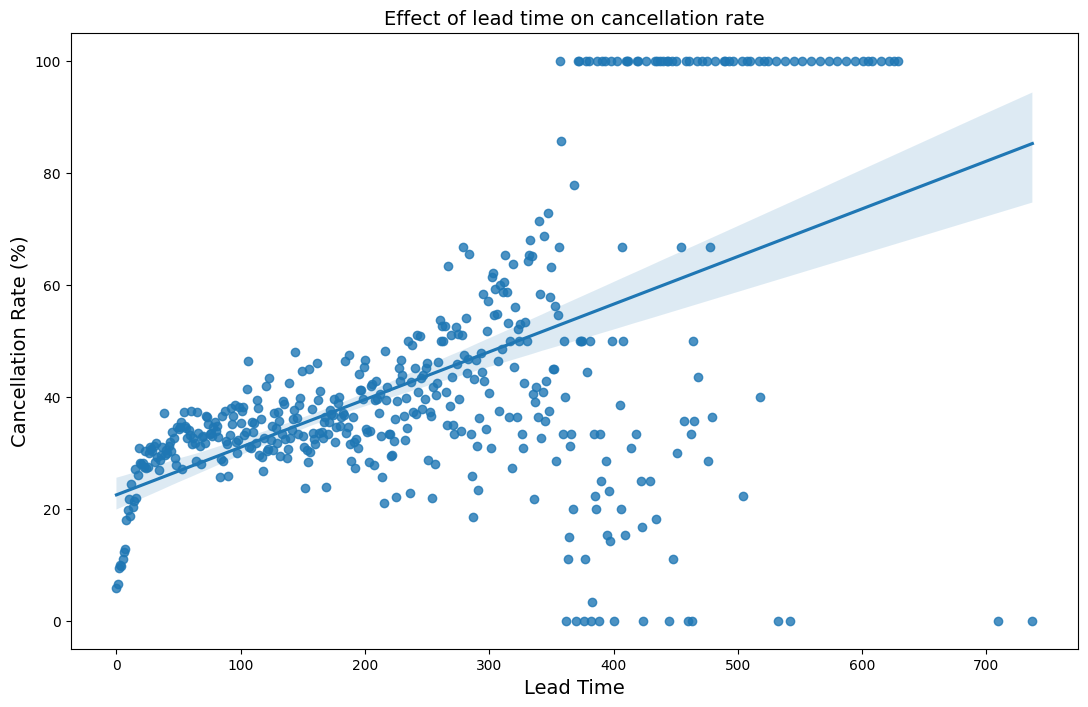

In [34]:
lead_cancel_data = df.groupby('lead_time')['is_canceled'].mean()

# Plot
plt.figure(figsize=(13, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data.values * 100)
plt.title('Effect of lead time on cancellation rate', fontsize=14)
plt.xlabel('Lead Time', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.show()

Terdapat kasus dimana cancelation rate berada di angka 100% dan 0& hal ini seharusnya tidak baik karena tidak mungkin analisis benar-benar bisa menentukan seseorang pasti akan mencancel atau tidak, bisa di katakan data tersebut tidak valid  untuk menanganinya bisa kita asumsikan  bahwa seseorang yang memesan pesanan di atas satu tahun tidak bisa di analisis karena terlalu jauh dan tidak masuk ketika seseorang memesan pesanan berjarak lebih dari satu tahun mari kita kita batasi lead time untuk menganalisis data hanya di bawah satu tahun

In [35]:
df.drop(df[df['lead_time'] > 365].index, inplace = True)

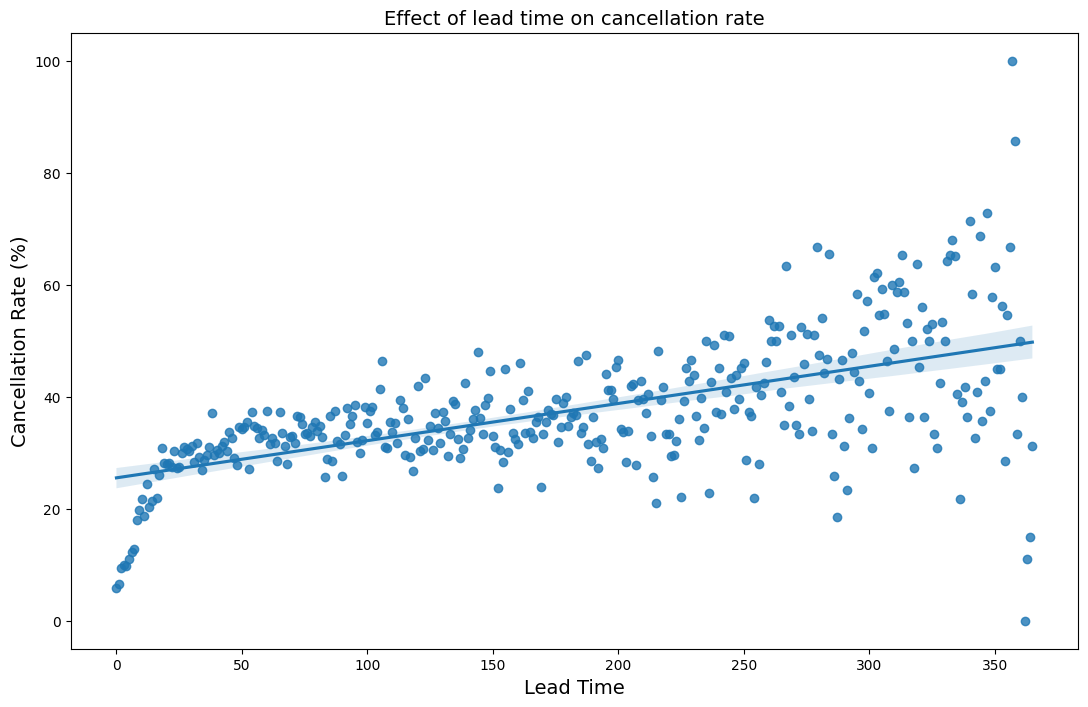

In [36]:
lead_cancel_data = df.groupby('lead_time')['is_canceled'].mean()

# Plot
plt.figure(figsize=(13, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data.values * 100)
plt.title('Effect of lead time on cancellation rate', fontsize=14)
plt.xlabel('Lead Time', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.show()

Dari hasil Analisis LeadTime didapatkan sebuah pola dimana semakin besar LeadTime (jarak seseorang untuk membooking dengan jadwal bookingnya) semakin besar juga kemungkinan pesanan tersebut akan di cancel

# 3. **Analisis Pengaruh Total Stay dan ADR Terhadap Cancellation**

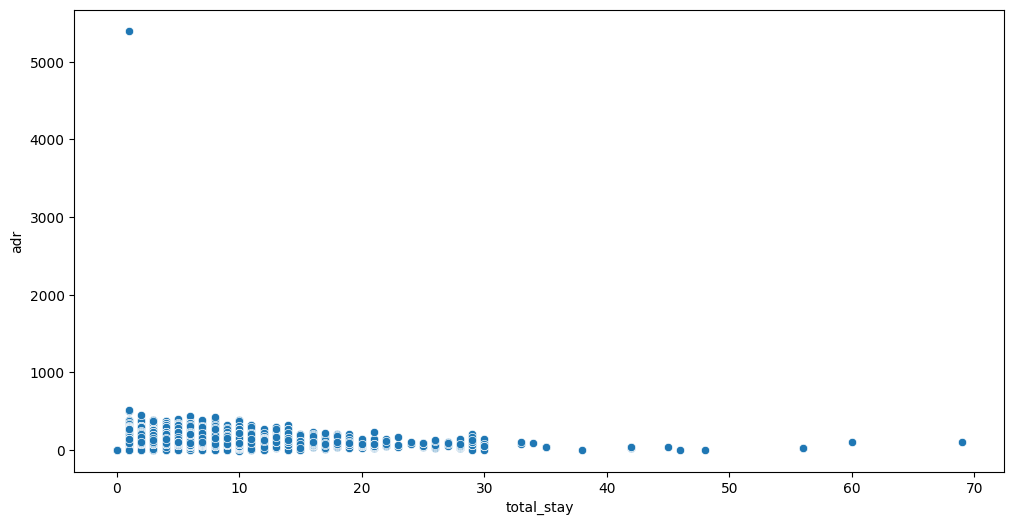

In [37]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

Terdapat outlier terdapat data di atas 5000, maka bisa kita handle dengan menghapus data tersebut.

In [38]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

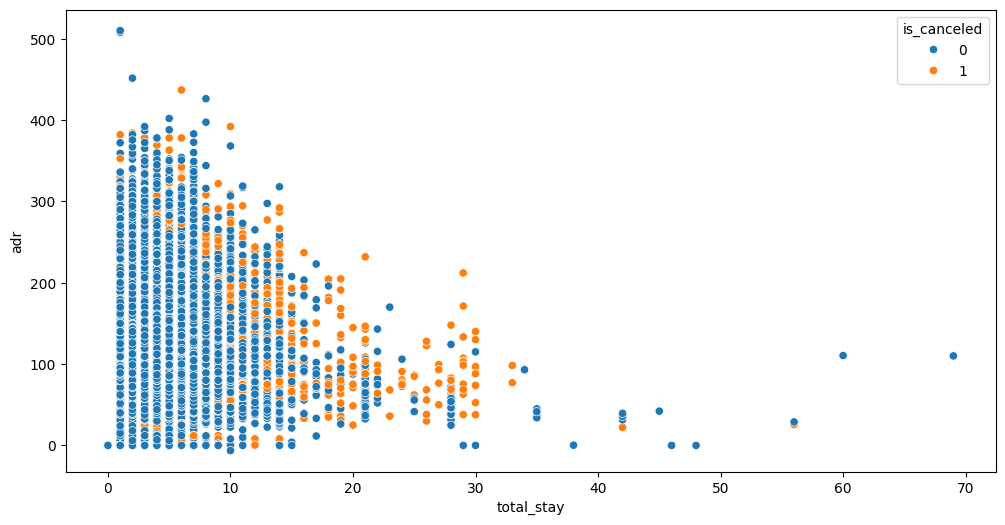

In [39]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df, hue='is_canceled')
plt.legend(title='is_canceled')
plt.show()

In [40]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['total_stay_group'] = pd.cut(df['total_stay'], bins=bins, labels=labels, right=False)


cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('total_stay_group')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('total_stay_group')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

grouped = df.groupby(['total_stay_group', 'is_canceled']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df.groupby('total_stay_group')['is_canceled'].count()

display(normalized_grouped.sort_values(by= "count", ascending=False), D3.sort_values(by= 'cancel_%', ascending=False))

is_canceled,0,1,count
total_stay_group,,,
1-10,0.727938,0.272062,83481
11-20,0.683122,0.316878,2755
21-30,0.475000,0.525000,160
31-40,0.409091,0.590909,22
41-50,0.857143,0.142857,7
51-60,0.500000,0.500000,2
61-70,1.000000,0.000000,2


,total_cancelled_bookings,total_bookings,cancel_%
total_stay_group,,,
31-40,13,22,59.09
21-30,84,160,52.50
51-60,1,2,50.00
11-20,873,2755,31.69
1-10,22712,83481,27.21
41-50,1,7,14.29
61-70,0,2,0.00


Terlihat sebuah pola semakin lama customer ingin tinggal semakin lama besar kemungkinan untuk cancel, namun terdapat limitasi dimana ketika total stay lebih dari 40 justru malah terjadi keadaan kemungkinan cancelation menurun hal ini mungkin menjadi tidak relevan sehingga kami akan menghapus baris data yang mana total stay group lebih dari 40 hari

In [41]:
df.drop(df[df['total_stay'] > 40].index, inplace = True)

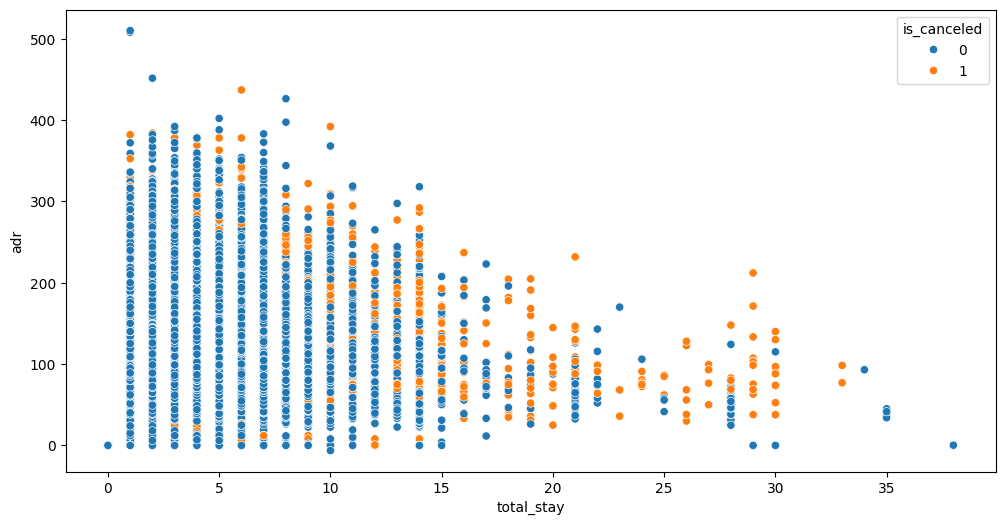

In [42]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df, hue='is_canceled')
plt.legend(title='is_canceled')
plt.show()

In [43]:
bins = [0, 10, 20, 30, 40]
labels = ['1-10', '11-20', '21-30', '31-40']
df['total_stay_group'] = pd.cut(df['total_stay'], bins=bins, labels=labels, right=False)

cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('total_stay_group')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('total_stay_group')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

grouped = df.groupby(['total_stay_group', 'is_canceled']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df.groupby('total_stay_group')['is_canceled'].count()

display(normalized_grouped.sort_values(by= "count", ascending=False), D3.sort_values(by= 'cancel_%', ascending=False))

is_canceled,0,1,count
total_stay_group,,,
1-10,0.727938,0.272062,83481
11-20,0.683122,0.316878,2755
21-30,0.475000,0.525000,160
31-40,0.409091,0.590909,22


,total_cancelled_bookings,total_bookings,cancel_%
total_stay_group,,,
31-40,13,22,59.09
21-30,84,160,52.50
11-20,873,2755,31.69
1-10,22712,83481,27.21


In [44]:
df.drop(df[df['adr'] > 300].index, inplace = True)

bins = [0, 100, 200, 300]
labels = ['1-100', '101-200', '201-300']
df['adr_group'] = pd.cut(df['adr'], bins=bins, labels=labels, right=False)

cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('adr_group')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('adr_group')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
display(D3)

,total_cancelled_bookings,total_bookings,cancel_%
adr_group,,,
1-100,9792,44447,22.03
101-200,12061,37117,32.49
201-300,1743,4580,38.06


1. Keabanyakan data tersebar di antara 1-10  hari sedangkan sisanya sebagian data minor, dari data minor ini di temukan semakin lama customer ingin tinggal, semakin mungkin customer tersebut untuk membatalkan pesananan, namun ada limitasi batas penilaian ketika seseorang membooking lebih dari 40 hari

2. Dari hasil Analisis Total Stay penyewa, ketika penyewa memesan kamar semakin lama jangka waktu penyewaan, semakin besar juga kemungkinan pesanan tersebut akan di cancel, namun analisis ini hanya berpengaruh untuk penyewaan kamar di bawah 40 hari.

2. Dari hasil Analisis ADR, semakin besar adr yang di keluarkan semakin besar kemungkinan seseorang untuk melakukan cancel, dan terdapat limitasi ketika data di atas 300 adr

# 4. **Analsis Pengaruh Special Request Penyewa Terhadap Tingkat Cancellation** 

In [45]:
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

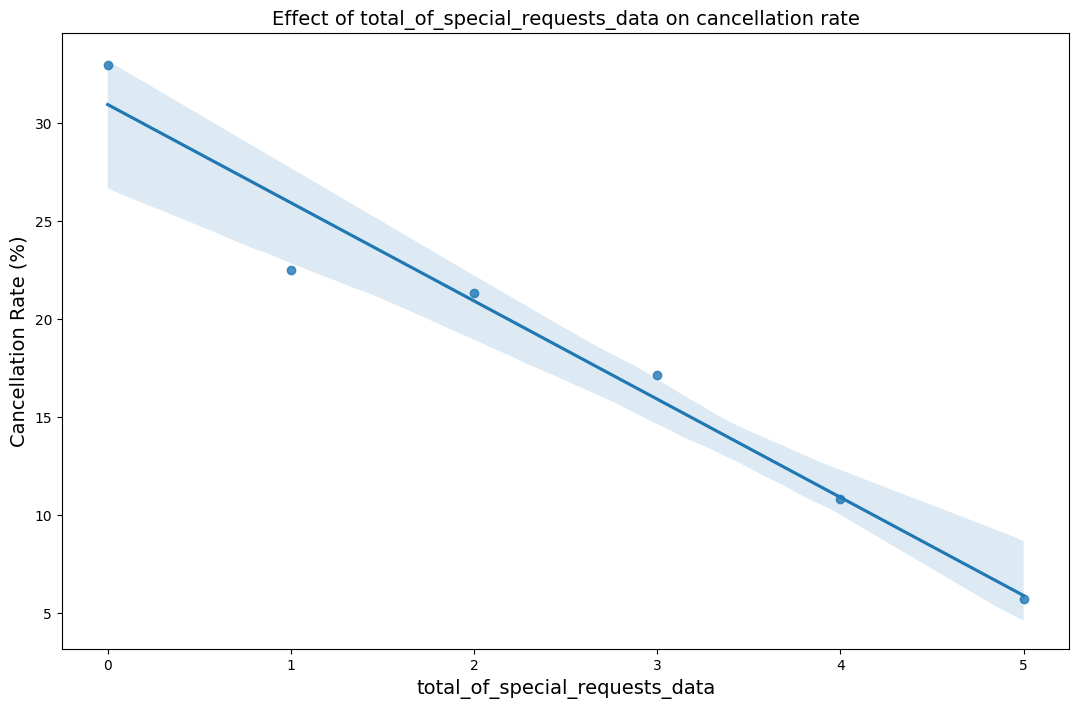

In [46]:
total_of_special_requests_data = df.groupby('total_of_special_requests')['is_canceled'].mean()

# Plot
plt.figure(figsize=(13, 8))
sns.regplot(x=total_of_special_requests_data.index, y=total_of_special_requests_data.values * 100)
plt.title('Effect of total_of_special_requests_data on cancellation rate', fontsize=14)
plt.xlabel('total_of_special_requests_data', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.show()

In [47]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('total_of_special_requests')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('total_of_special_requests')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

display(D3.sort_values(by= 'cancel_%', ascending=False))

,total_cancelled_bookings,total_bookings,cancel_%
total_of_special_requests,,,
0,14244,43230,32.95
1,6438,28630,22.49
2,2491,11676,21.33
3,389,2274,17.11
4,34,314,10.83
5,2,35,5.71


1. Dari hasil analisis menunjukan bahwa semakin banyak penyewa melakukan request semakin sedikit kemungkinan penyewa untuk melakukan cancel, hal ini bisa di asumsikan bahwa penyewa memang benar memiliki niat untuk menginap di lain sisi, penyewa secara psikologis mendapatkan kepuasan ketika request yang mereka ajukan di berikan.

1. Menurut https://www.oyster.com/articles/12-things-to-ask-for-when-you-check-into-your-hotel-room/ terdapat beberapa request yang biasanya di ajukan pelanggan
   * Request untuk late Check out
   * Request untuk pemandangan kamar
   * Request easy akses fasilitas
   * Request quiet kamar hotel
   * Request Cleaning Time
   * Request Netflix akses

# 5. **Analisis Pengaruh Banyak Penyewa Terhadap Tingkat Cancellation**

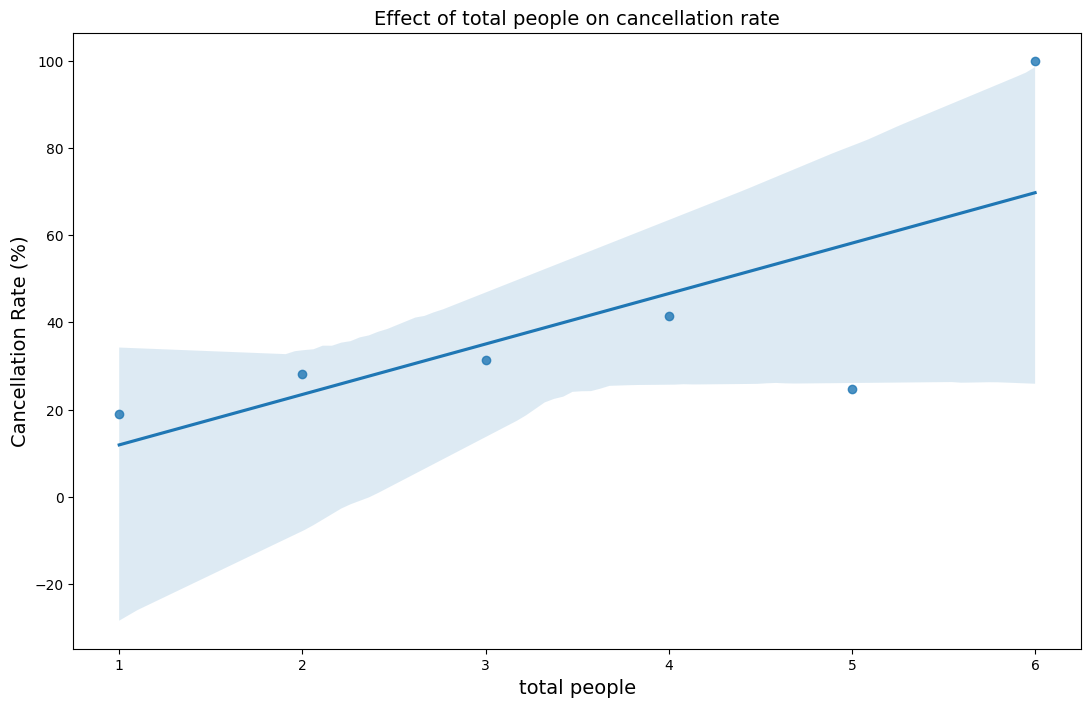

In [48]:
total_people_data = df.groupby('total_people')['is_canceled'].mean()

# Plot
plt.figure(figsize=(13, 8))
sns.regplot(x=total_people_data.index, y=total_people_data.values * 100)
plt.title('Effect of total people on cancellation rate', fontsize=14)
plt.xlabel('total people', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.show()

In [49]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('total_people')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('total_people')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

display(D3.sort_values(by= 'total_people', ascending=True))

,total_cancelled_bookings,total_bookings,cancel_%
total_people,,,
1,3034,15934,19.04
2,15846,56389,28.10
3,3146,9998,31.47
4,1541,3716,41.47
5,30,121,24.79
6,1,1,100.00


1. Kebanyakan data tersebar dari total people 1 - 4, sedangkan sisanya bisa di anggap data minor, terlebih data menunjukan tingkat cancelation yang meningkat seiring bertambahnya jumlah penginap.
1. pola kenaikan cancelation data hanya relevan ketika penyewa berada di rentang 1 - 5 orang, maka dari itu di simpulkan limitasi data ketika data lebih dari 4 orang kemungkinan hasil yang di dapat akan kurang baik.

# 6. **Analisis Pengaruh tipe Hotel, Company atau Personal dan Seasson Terhadap Tingkat Cancelation**

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,15750,52635,29.92
Resort Hotel,7848,33524,23.41


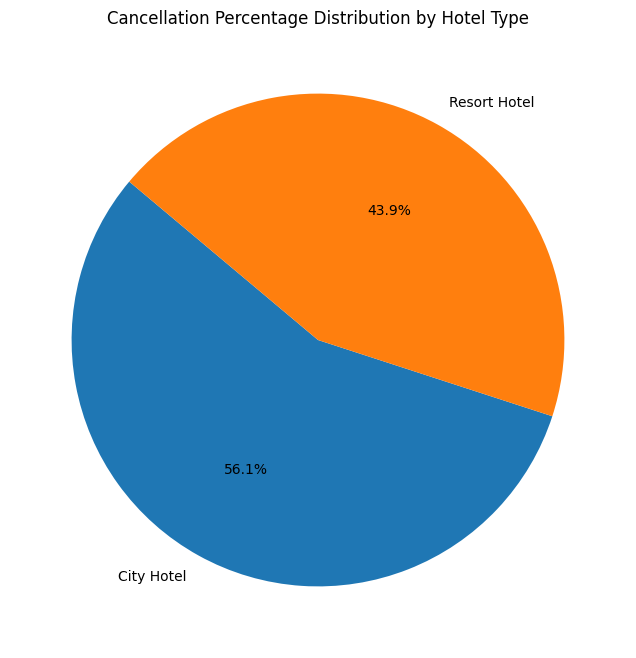

In [50]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

display(D3.sort_values(by= 'cancel_%', ascending=False))

plt.figure(figsize=(8, 8))
plt.pie(D3['cancel_%'], labels=D3.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Percentage Distribution by Hotel Type')
plt.show()

City Hotel menjadi bagian yang menyumbangkan percentase cancel yang paling besar sebesar 30% dari jumlah pesanan City Hotel sedangkan resort hotel sebesar 23.5% dari jumlah pesanan Resort Hotel, sedangkan persebaran cancellation dari kedua resort dan hotel 56% berada pada city hotel dan Resort hotel memiliki 44%, mengartikan bahwa kolom hotel adalah salah satu feature yang perlu di pertimbangkan

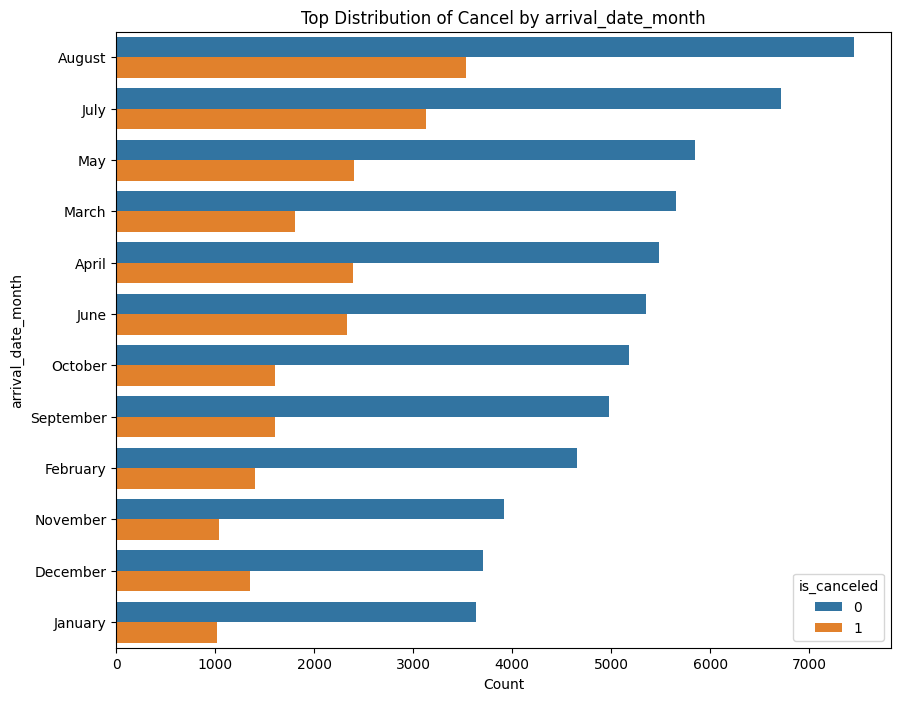

In [51]:
destination_counts = df.groupby('arrival_date_month')['is_canceled'].value_counts().reset_index(name='Count')

top_destinations = destination_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='arrival_date_month', hue='is_canceled', data=top_destinations)
plt.title('Top Distribution of Cancel by arrival_date_month')
plt.xlabel('Count')
plt.ylabel('arrival_date_month')
plt.legend(title='is_canceled')
plt.show()

In [52]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('arrival_date_month')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('arrival_date_month')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

grouped = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack().fillna(0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)
normalized_grouped['count'] = df.groupby('arrival_date_month')['is_canceled'].count()

display(normalized_grouped.sort_values(by= 1, ascending=False), D3.sort_values(by= 'cancel_%', ascending=False))

is_canceled,0,1,count
arrival_date_month,,,
August,0.678562,0.321438,10985
July,0.682419,0.317581,9840
June,0.696122,0.303878,7684
April,0.696326,0.303674,7867
May,0.708520,0.291480,8251
December,0.733016,0.266984,5049
September,0.756223,0.243777,6588
March,0.758149,0.241851,7455
October,0.763829,0.236171,6779


,total_cancelled_bookings,total_bookings,cancel_%
arrival_date_month,,,
August,3531,10985,32.14
July,3125,9840,31.76
June,2335,7684,30.39
April,2389,7867,30.37
May,2405,8251,29.15
December,1348,5049,26.70
September,1606,6588,24.38
March,1803,7455,24.19
October,1601,6779,23.62


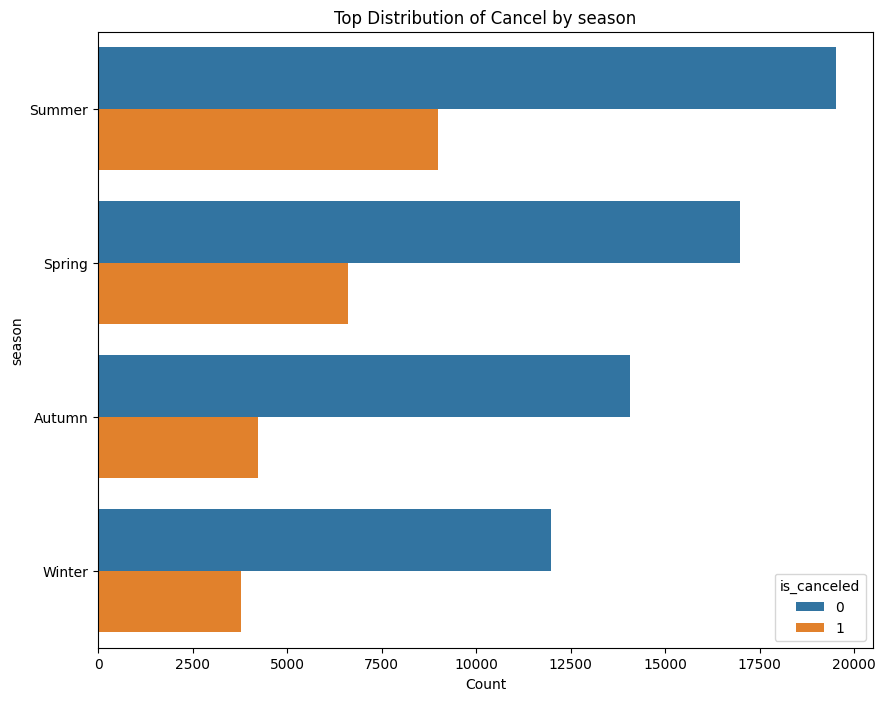

In [53]:
seasons_portugal = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
    'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter'
}

df['season'] = df['arrival_date_month'].map(seasons_portugal)

# Now you can perform operations on your DataFrame grouped by the new 'season' column
# For example, to see the total number of cancellations per season:
cancellations_by_season = df.groupby('season')['is_canceled'].sum().reset_index()

destination_counts = df.groupby('season')['is_canceled'].value_counts().reset_index(name='Count')

top_destinations = destination_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='season', hue='is_canceled', data=top_destinations)
plt.title('Top Distribution of Cancel by season')
plt.xlabel('Count')
plt.ylabel('season')
plt.legend(title='is_canceled')
plt.show()

In [54]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('season')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('season')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
display(D3.sort_values(by= 'cancel_%', ascending=False))

,total_cancelled_bookings,total_bookings,cancel_%
season,,,
Summer,8991,28509,31.54
Spring,6597,23573,27.99
Winter,3769,15756,23.92
Autumn,4241,18321,23.15


In [55]:
df['company_or_personal'] = np.where(df['company_or_personal'] == 0, 'Personal', 'Company')
grouped = df.groupby(['season', 'hotel','company_or_personal', 'is_canceled']).size().unstack(fill_value=0)
grouped['total_booking'] = grouped[0] + grouped[1]
grouped['cancel_%'] = round(grouped[1] / (grouped[0] + grouped[1]) * 100,2)
grouped = grouped.drop(columns=[0, 1])
grouped_sorted = grouped.sort_values(by='cancel_%', ascending=False)

display(grouped_sorted.sort_values(by= 'season', ascending=True))

is_canceled                              total_booking  cancel_%
season hotel        company_or_personal                         
Autumn City Hotel   Personal                     10489     26.42
       Resort Hotel Personal                      6314     20.62
       City Hotel   Company                        751     13.85
       Resort Hotel Company                        767      8.34
Spring City Hotel   Personal                     14369     32.65
       Resort Hotel Personal                      7487     23.17
       City Hotel   Company                        805     11.68
       Resort Hotel Company                        912      8.33
Summer City Hotel   Personal                     16405     32.56
       Resort Hotel Personal                     11252     31.31
                    Company                        254     17.32
       City Hotel   Company                        598     13.71
Winter City Hotel   Personal                      8610     30.31
       Resort Hotel Personal                      5999     17.60
       City Hotel   Company                        608      9.05
       Resort Hotel Company                        539      8.91

In [56]:
grouped = df.groupby(['season', 'hotel','is_repeated_guest', 'is_canceled']).size().unstack(fill_value=0)
grouped['total_booking'] = grouped[0] + grouped[1]
grouped['cancel_%'] = round(grouped[1] / (grouped[0] + grouped[1]) * 100,2)
grouped = grouped.drop(columns=[0, 1])
grouped_sorted = grouped.sort_values(by='cancel_%', ascending=False)

display(grouped_sorted.sort_values(by= 'season', ascending=True))

is_canceled                            total_booking  cancel_%
season hotel        is_repeated_guest                         
Autumn City Hotel   0                          10822     25.86
       Resort Hotel 0                           6833     19.82
       City Hotel   1                            418     18.18
       Resort Hotel 1                            248      4.84
Spring City Hotel   0                          14739     32.27
       Resort Hotel 0                           7826     22.95
       City Hotel   1                            435      6.90
       Resort Hotel 1                            573      2.62
Summer City Hotel   0                          16654     32.34
       Resort Hotel 0                          11216     31.60
       City Hotel   1                            349     10.89
       Resort Hotel 1                            290      7.93
Winter City Hotel   0                           8764     29.91
       Resort Hotel 0                           5955     18.17
       City Hotel   1                            454      9.69
       Resort Hotel 1                            583      3.77

**Dari Hasil Analisis pada 3 aspek tersebut**
1. Bulan Agustus dan July memiliki persentase cancel terbesar, keduanya juga termasuk kedalam musim panas, selain itu juga ternyata musim panas.
1. Dan juga Summer atau musim panas menjadi top seasson yang paling diminati di ikuti spring dan winter.
1. Di temukan juga bahwa tingkat cancellation yang di lakukan oleh pemesan dari company lebih kecil dari personal dalam segala aspek.

# 7. **Analisis Deposit Type Terhadap tingkat Cancelation**

In [57]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

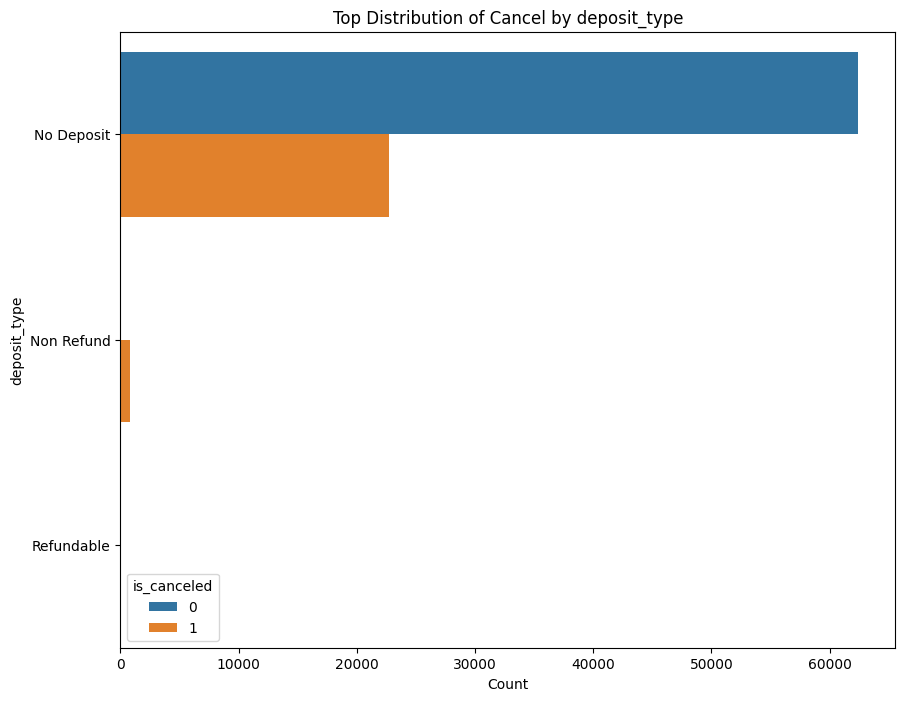

In [58]:
deposit_type_counts = df.groupby('deposit_type')['is_canceled'].value_counts().reset_index(name='Count')

top_destinations = deposit_type_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='deposit_type', hue='is_canceled', data=top_destinations)
plt.title('Top Distribution of Cancel by deposit_type')
plt.xlabel('Count')
plt.ylabel('deposit_type')
plt.legend(title='is_canceled')
plt.show()


In [59]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('deposit_type')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('deposit_type')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)

display(D3.sort_values(by= 'cancel_%', ascending=True))

,total_cancelled_bookings,total_bookings,cancel_%
deposit_type,,,
Refundable,25,104,24.04
No Deposit,22740,85167,26.70
Non Refund,833,888,93.81


Hasil Analisis sebenarnya menggambarkan bahwa deposit type seperti non refund tidak terlalu berpengaruh terhadap cancelation.

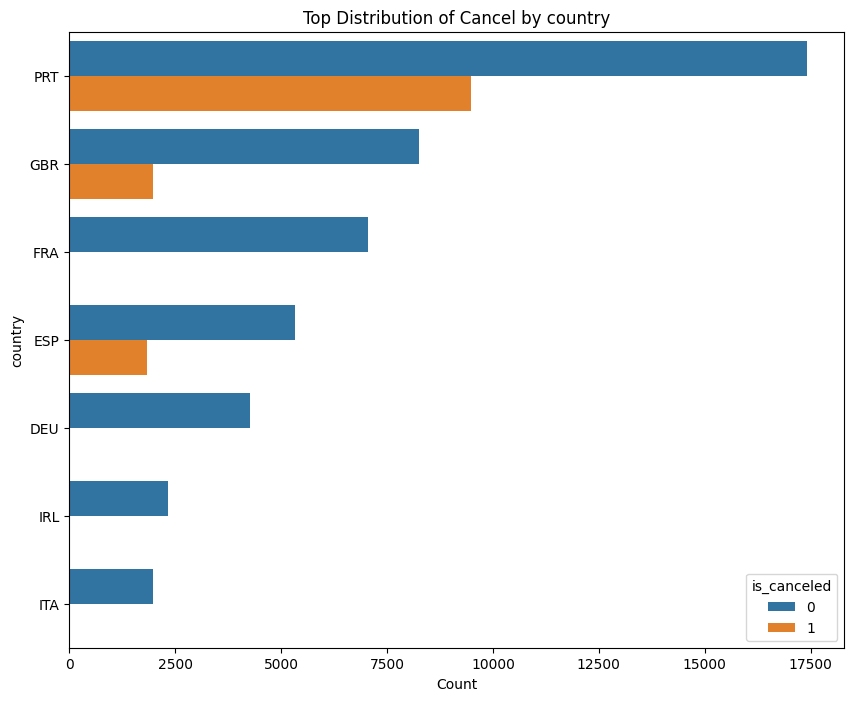

In [60]:
destination_counts = df.groupby('country')['is_canceled'].value_counts().reset_index(name='Count')

top_destinations = destination_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='country', hue='is_canceled', data=top_destinations)
plt.title('Top Distribution of Cancel by country')
plt.xlabel('Count')
plt.ylabel('country')
plt.legend(title='is_canceled')
plt.show()


In [61]:
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('country')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('country')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
display(D3.sort_values(by= 'total_bookings', ascending=False).head(10))

,total_cancelled_bookings,total_bookings,cancel_%
country,,,
PRT,9493.0,26915,35.27
GBR,1976.0,10237,19.30
FRA,1717.0,8767,19.58
ESP,1840.0,7166,25.68
DEU,1049.0,5322,19.71
ITA,1069.0,3047,35.08
IRL,666.0,3003,22.18
BEL,407.0,2058,19.78
BRA,721.0,1982,36.38


Customer di dominasi oleh penduduk lokal yaitu portugal dan di ikuti oleh britanian, franch & spanyol, hal tersebut menggambarkan bahwa pasar domestik salah satu yang memiliki pasar yang besar di ikuti pasar foreigner dari 3 negara lainnya seperti brianian, franch dan spanyol menjadi pasar yang besar dan menjanjikan yang bisa terus di kembangkan.

In [62]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_or_personal,total_stay,total_people,total_stay_group,adr_group,season
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Personal,0,2,1-10,1-100,Summer
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Personal,1,1,1-10,1-100,Summer
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Personal,1,1,1-10,1-100,Summer
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,Personal,2,2,1-10,1-100,Summer
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Personal,2,2,1-10,101-200,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,Personal,7,2,1-10,1-100,Summer
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,Personal,7,3,1-10,201-300,Summer
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,Personal,7,2,1-10,101-200,Summer
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,Personal,7,2,1-10,101-200,Summer


# Data Preprocessing

In [63]:
df.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','agent','company','days_in_waiting_list','customer_type','reservation_status','reservation_status_date','total_stay_group','adr_group'],axis=1, inplace=True)

In [64]:
season_mapping = [
    {'col':'season',
    'mapping':{
        'Winter'      :    0,
        'Spring'       :    1, 
        'Summer'       :    2, 
        'Autumn'       :    3, 
    }}
] 


In [65]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['hotel', 'company_or_personal']),
    ('ordinal', ce.OrdinalEncoder(mapping= season_mapping), ['season']),
], remainder='passthrough')

In [66]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [67]:
x = pd.DataFrame(transformer.fit_transform(x),columns=transformer.get_feature_names_out())
x.head()

,onehot__hotel_Resort Hotel,onehot__company_or_personal_Personal,ordinal__season,remainder__lead_time,remainder__is_repeated_guest,remainder__adr,remainder__required_car_parking_spaces,remainder__total_of_special_requests,remainder__total_stay,remainder__total_people
0,1.0,1.0,2.0,342.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,1.0,2.0,7.0,0.0,75.0,0.0,0.0,1.0,1.0
2,1.0,1.0,2.0,13.0,0.0,75.0,0.0,0.0,1.0,1.0
3,1.0,1.0,2.0,14.0,0.0,98.0,0.0,1.0,2.0,2.0
4,1.0,1.0,2.0,0.0,0.0,107.0,0.0,0.0,2.0,2.0


# Modeling

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [69]:
sm = SMOTE(random_state=42)
x_oversample, y_oversample = sm.fit_resample(x_train, y_train) # setelah di oversampling with smote

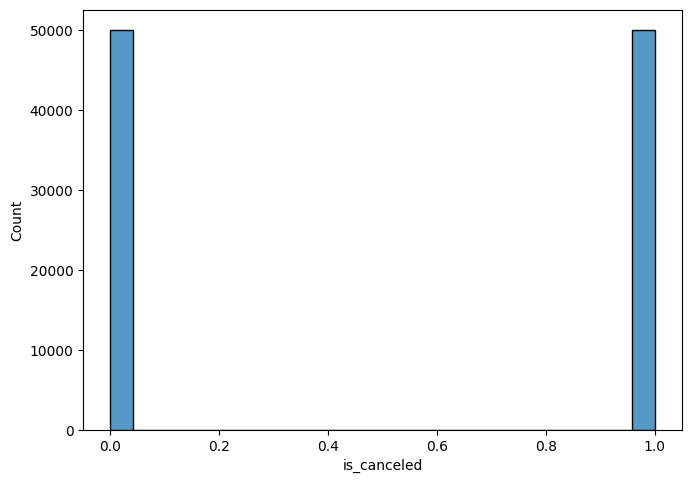

In [70]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=y_oversample)
plt.show()

In [71]:
logreg=LogisticRegression()

In [72]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

Tanpa Oversampling

In [74]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='error')))

In [75]:
for name, model in models:
    print("\033[1mAlgorithm name : "+name+"\033[0m")
    model.fit(x_train,y_train)
    
    predictions=model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    print("Accuracy Score :",end=" ")
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc*100)

Algorithm name : LogisticRegression
[[11915  3905]
 [  597   815]]
Accuracy Score : 73.87418755803157
Algorithm name : Naive_bayes
[[ 2508   133]
 [10004  4587]]
Accuracy Score : 41.17339832869081
Algorithm name : Random Forest


[[11080  2651]
 [ 1432  2069]]
Accuracy Score : 76.30571030640668
Algorithm name : Decision_tree
[[10031  2473]
 [ 2481  2247]]
Accuracy Score : 71.25116063138347
Algorithm name : KNN
[[10749  3216]
 [ 1763  1504]]
Accuracy Score : 71.1060817084494
Algorithm name : XGBoost
[[11449  2921]
 [ 1063  1799]]
Accuracy Score : 76.88022284122563


In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import pandas as pd
from tabulate import tabulate

In [77]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='error')))

# Create a results table to store the performance of each model
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Train each model, calculate performance metrics, and store in results table
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    new_row = {'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
    results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    # results = results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}, ignore_index=True)
    
# Sort results table by accuracy in ascending order
results = results.sort_values(by=['Precision'])

In [78]:
# Print results table in a nicely formatted way
print("\n" + "="*60)
print("                     MODEL PERFORMANCE")
print("="*60)
print(tabulate(results, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print the best model based on accuracy
best_model = results.iloc[-1]['Model']
best_accuracy = results.iloc[-1]['Precision']
print('\n\033[1m' + f'Best Model: {best_model} with Precision of {100*best_accuracy:.2f}%' + '\033[0m')

# Print performance metrics of the best model
best_model = results.iloc[-1]
print("\n" + "="*60)
print(f"Best Model: {best_model['Model']}")
print(f"Accuracy Score: {best_model['Accuracy']*100:.2f}%")
print(f"Precision Score: {best_model['Precision']*100:.2f}%")
print(f"Recall Score: {best_model['Recall']*100:.2f}%")
print(f"F1 Score: {best_model['F1 Score']*100:.2f}%")
print(f"ROC AUC Score: {best_model['ROC AUC']*100:.2f}%")
print("="*60 + "\n")


                     MODEL PERFORMANCE
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   ROC AUC │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Naive Bayes         │   0.411734 │    0.314372 │ 0.971822 │   0.475066 │  0.586135 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ KNN                 │   0.711061 │    0.460361 │ 0.318644 │   0.376612 │  0.58887  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Decision Tree       │   0.710713 │    0.472135 │ 0.475636 │   0.473879 │  0.637514 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Logistic Regression │   0.738742 │    0.577195 │ 0.172669 │   0.265819 │  0.562478 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ R

With oversample

In [79]:
for name, model in models:
    print("\033[1mAlgorithm name : "+name+"\033[0m")
    model.fit(x_oversample,y_oversample)
    
    predictions=model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    print("Accuracy Score :",end=" ")
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc*100)

Algorithm name : Logistic Regression


[[8115 1576]
 [4397 3144]]
Accuracy Score : 65.33774373259052
Algorithm name : Naive Bayes
[[2518  134]
 [9994 4586]]
Accuracy Score : 41.22562674094708
Algorithm name : Random Forest
[[10888  2603]
 [ 1624  2117]]
Accuracy Score : 75.47005571030641
Algorithm name : Decision Tree
[[10034  2488]
 [ 2478  2232]]
Accuracy Score : 71.18152274837512
Algorithm name : KNN
[[7871 1862]
 [4641 2858]]
Accuracy Score : 62.26207056638812
Algorithm name : XGBoost
[[11261  2751]
 [ 1251  1969]]
Accuracy Score : 76.77576601671309


In [80]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='error')))

# Create a results table to store the performance of each model
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Train each model, calculate performance metrics, and store in results table
for name, model in models:
    model.fit(x_oversample, y_oversample)
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    new_row = {'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
    results = pd.concat([results, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    # results = results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}, ignore_index=True)
    
# Sort results table by accuracy in ascending order
results = results.sort_values(by=['Precision'])

# Print results table in a nicely formatted way
print("\n" + "="*60)
print("                     MODEL PERFORMANCE")
print("="*60)
print(tabulate(results, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print the best model based on accuracy
best_model = results.iloc[-1]['Model']
best_accuracy = results.iloc[-1]['Precision']
print('\n\033[1m' + f'Best Model: {best_model} with Precision of {100*best_accuracy:.2f}%' + '\033[0m')

# Print performance metrics of the best model
best_model = results.iloc[-1]
print("\n" + "="*60)
print(f"Best Model: {best_model['Model']}")
print(f"Accuracy Score: {best_model['Accuracy']*100:.2f}%")
print(f"Precision Score: {best_model['Precision']*100:.2f}%")
print(f"Recall Score: {best_model['Recall']*100:.2f}%")
print(f"F1 Score: {best_model['F1 Score']*100:.2f}%")
print(f"ROC AUC Score: {best_model['ROC AUC']*100:.2f}%")
print("="*60 + "\n")


                     MODEL PERFORMANCE
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   ROC AUC │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Naive Bayes         │   0.412256 │    0.31454  │ 0.97161  │   0.475233 │  0.586428 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ KNN                 │   0.622621 │    0.381117 │ 0.605508 │   0.467796 │  0.617292 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Logistic Regression │   0.653377 │    0.416921 │ 0.666102 │   0.512846 │  0.65734  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Decision Tree       │   0.711989 │    0.474459 │ 0.478178 │   0.476311 │  0.639185 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ R

Testing dengan data oversample tidak lebih baik dari dataset sebelum oversampling

Untuk itu kita tetap menggunakan dataset sebelum di oversampling

In [92]:
import plotly.express as px
import pandas as pd
# create a new DataFrame with the updated data
data = {
    'Model': ['LogisticRegression', 'Naive_bayes', 'Random Forest', 'Decision_tree', 'KNN', 'XGBoost'],
    'Score': [ 0.577, 0.314, 0.581, 0.471, 0.460, 0.628],
    'Precision Score': [ 0.577, 0.314, 0.581, 0.471, 0.460, 0.628]
}
models = pd.DataFrame(data)

# create the bar chart
fig = px.bar(data_frame=models, x='Score', y='Model', color='Precision Score', template='plotly_dark', title='Models Comparison')

# show the chart
fig.show()

Berdasarkan hasil classification report (models comparison) dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa model Xgboost memiliki score yang paling baik di antara yang lainnya dalam menentukan precision.

# Hyperparameters Tunning

In [81]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

data = x_train
target = y_train

In [82]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np

# Load the Iris dataset
# iris = load_iris()
X = x_train # iris.data
y = y_train # iris.target

# Create a support vector classifier
classifier = xgb.XGBClassifier(eval_metric='error')

# Define the number of folds
k = 10

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
accuracy_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(classifier, X, y, cv=kf, scoring='precision_macro')
recall_scores = cross_val_score(classifier, X, y, cv=kf, scoring='recall_macro')
f1_scores = cross_val_score(classifier, X, y, cv=kf, scoring='f1_macro')
roc_auc_scores = cross_val_score(classifier, X, y, cv=kf, scoring='roc_auc_ovr')

# Print the mean score for each metric
print(f"Accuracy: {np.mean(accuracy_scores)}")
print(f"Precision: {np.mean(precision_scores)}")
print(f"Recall: {np.mean(recall_scores)}")
print(f"F1 Score: {np.mean(f1_scores)}")
print(f"ROC AUC: {np.mean(roc_auc_scores)}")

Accuracy: 0.7643156978165286
Precision: 0.7050035564353985
Recall: 0.640957477806177
F1 Score: 0.6551238452672549
ROC AUC: 0.7825473491371489


In [83]:
classifier = xgb.XGBClassifier(eval_metric='error')

estimator=Pipeline([
    ('preprocess',transformer),
    ('model',classifier)
])

In [84]:
# Define the parameter grid to search
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the pipeline
pipeline = Pipeline([('classifier', xgb_model)])

# Initialize GridSearchCV with precision scoring
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred_tune = grid_search.predict(x_test)
Recall = precision_score(y_test, y_pred_tune, average='macro')
print("Precision:",Recall)

Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Recall: 0.7188637946231771


Terlihat bahwa model Xgboost setelah kita tuning hyperparameternya memiliki nilai Precsision yang lebih baik.

Mari kita lihat juga perbandingan classification reportnya

In [85]:
report_default = classification_report(y_test, y_pred)
report_tuned = classification_report(y_test, y_pred_tune)

print('Classification Report Default XGBOOST : \n', report_default)
print('Classification Report Tuned XGBOOST : \n', report_tuned)

Classification Report Default XGBOOST : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85     12512
           1       0.61      0.42      0.50      4720

    accuracy                           0.77     17232
   macro avg       0.71      0.66      0.67     17232
weighted avg       0.75      0.77      0.75     17232

Classification Report Tuned XGBOOST : 
               precision    recall  f1-score   support

           0       0.80      0.92      0.85     12512
           1       0.64      0.38      0.48      4720

    accuracy                           0.77     17232
   macro avg       0.72      0.65      0.67     17232
weighted avg       0.75      0.77      0.75     17232



# Feature Importance

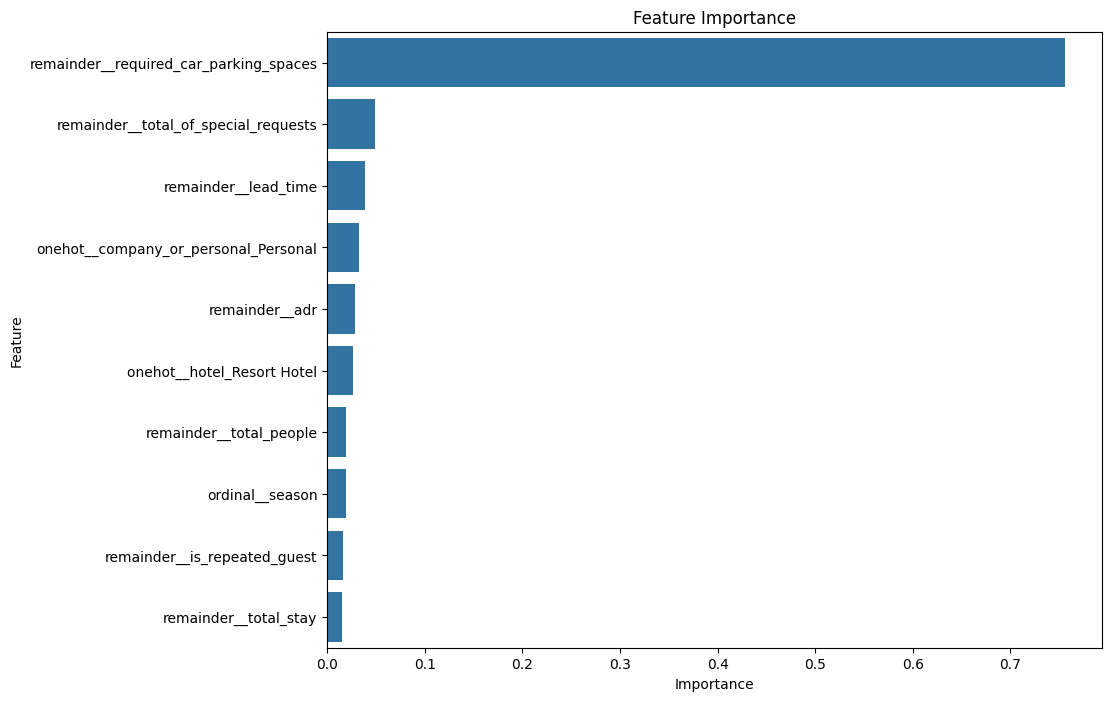

In [91]:
xgb_model.fit(x_train, y_train)

feature_importances = xgb_model.feature_importances_

# Membuat DataFrame untuk memudahkan visualisasi
features_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Setelah di uji berdasarkan Error di temui bahwa variabel request_car_parking berperan paling dominan dalam menentukan seseorang akan melakukan cancel atau book.

# Best Model

In [ ]:
print('Classification Report Tuned XGBOOST : \n', report_tuned)

Classification Report Tuned XGBOOST : 
               precision    recall  f1-score   support

           0       0.80      0.92      0.85     12512
           1       0.64      0.38      0.48      4720

    accuracy                           0.77     17232
   macro avg       0.72      0.65      0.67     17232
weighted avg       0.75      0.77      0.75     17232



# Summary

# Berdasarkan EDA yang kita analisis didapatkan beberapa hal di antaranya :
1. Pemesan paling banyak berasal dari pemesan domestik yaitu portugal di ikuti pengunjung luar negeri seperti britanian franch hingga sepanyol, yang mengartikan pengunjung dari latar belakang ini memiliki potensial lebih lanjut untuk di ajang promosi dan pemasaran yang lebih besar karena memiliki lingkup audience yang besar

1. Hotel yang melakukan sistem deposit tidak terlalu berpengaruh kepada pelanggan untuk melanjutkan booking di temuin sekita 93.81 persen hotel dari 888 pesanan hotel yang melakukan sistem non refund tetap melakukan cancel, hal ini menjadikan hotel tetap untung walau pengunjung membatalkan pesanan

1. Puncak dari jumlah pesanan terdapat pada bulan Agustus dan July, 10.985 pesanan terdapat di bulan agustus dan 9840 pesanan berada pada bulan july, Agustus dan July ini juga masih satu seasson yang itu summer yang mengartikan kunjungan terbanyak berasal di season Summer hal ini menjadi suatu acuan dimana machine learning yang kita buat nantinya akan sangat menguntungkan di antara bulan july sampai agustus ini.

1. Kemampuan Hotel untuk memberikan spesial request yang di ajukan oleh pengunjung juga secara langsung menambah minat pengunjung untuk melanjutkan menginap.

# Alasan pembatalan pemesanan bisa berbeda-beda. Pelanggan mungkin meminta sesuatu yang tidak tersedia. 
berdasarkan EDA:

1. jarak seseorang untuk booking sampai saat hari kedatangan berpengaruh terhadap tingkat cancellation, dimana pelanggan yang membooking jauh - jauh hari lebih rentan untuk melakukan cancel

1. Parkir mobil tidak ditindaklanjuti oleh hotel, sedangkan pembatalan perjalanan lainnya berada di luar kendali hotel. dalam hal apa pun.
1. Pembatalan juga di pengaruhi dari permintaan spesial yang terkadang tidak dapat di penuhi oleh hotel seperti kamar yang memiliki akses langsung ke kolam renang, pemadangan yang kamar miliki, sampai mungkin permintaan lain yang tidak disebutkan

# Simpulan
* Dari hasil analisis yang kita temuin menghasilkan kesimpulan bahwa sebenarnya ada beberapa faktor seseorang akan melakukan cancel terhadap pesanannya, ada berbagai macam hal yang mungkin diluar dari kemampuan yang dapat kita ketahui berdasarkan hal tersebut kita tidak bisa memaksakan seseorang untuk terus melanjutkan bookingnya.

* Antisipasi yang bisa kita lakukan adalah melakukan strategy OverBooking yaitu dimana kita bisa menyewakan kamar di luar kapasitas yang hotel miliki secara lebih hati - hati dan efisien, strategy ini juga lebih menguntungkan karena hotel mampu mengantisipasi cancel dan hotel yang memilki sistem non refund juga di untungkan karena keuntungan yang di dapat saat seseorang melakukan cancel


# Simulation bagaiamana strategy ini bisa menguntungkan dengan di dukung oleh model

In [ ]:
august_data = df[df['season'] == 3 ]
# Calculate the average ADR for the month of August
average_adr_august = august_data['adr'].mean()

print(f"rata - rata ADR Bulan Agustus: {average_adr_august}")

rata - rata ADR Bulan Agustus: nan


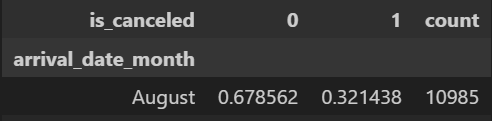

68% book dan 32% cancel

Misal saat bulan agustus HighSeason
sebuah hotel memiliki jumlah unit sebanyak 300 kamar dan berstatus FullBook
karena tidak menggunakan model, hotel tidak mengetahui perkiraan jumlah pesanan yang akan di cancel.

Mengambil data aktual rata-rata di bulan agustus sebanyak 68 persen data booking dan 32 persen data cancel, terdapat 96(32%) pesanan cancel  dari 300(100%) pesanan dan sisanya 204(68%) pesanan yang di konfirm, 

Harga Perkamar 136 USD di asumsikan sebagai rata-rata ADR di bulan Agustus. 

Tanpa model 

* 300 Pesanan
* Harapan Keuntungan jika seluruhnya membooking 300 * 136 USD = 40.800 USD
* Kamar Yang terisi 300 - (300 x 32%) = 300 - 96  = 204 
* Jumlah Kamar yang kosong adalah 300 - 204 = 96 kamar
* Keuntungan Hotel 204 * 136 = 27.744 USD
* Kerugian Hotel 96 * 136 = 13.056 USD
* di karenakan kamar kosong hotel merugi 13.056 USD
* Tanpa Model hotel hanya Mendapat keuntungan 27.744 USD dari total Harapn 40.800 USD

Dengan Model ML dan strategy OverBooking

* 300 Pesanan
* Harapan Keuntungan jika seluruhnya membooking 300 * 136 USD = 40.800 USD
* Dengan Model memprediksi cancel
* cancel (96 * 64%) = 61
* Dengan analisis 61 orang akan melakukan cancel kita dapat membuka penyewaan untuk 61 orang
  sehingga di dapatkan total pesanan baru terdapat 300 + 61 = 361 pesanan
* actualnya terdapat 96 orang cancel jadi 361 - 96 = 265 kamar yang akan terisi
* keuntungan menjadi 265 * 136 USD = 36.040 USD dari 40.800  
* Kamar Kosong menjadi 300 - 268 = 32 kamar

Dengan Model, startegy OverBooking dan Non-refund book

* Jika hotel menggunakan sistem non refund dan deposit sebesar 50% 
* terdapat keuntungan tambahan sebesar 96 x (136 * 50%) = 96 x 68 = 6.528 USD
* Total Keuntungan 36.040 USD + 6.528 USD = 42.568 USD

Comparision

Harapan Keuntungan 40.800 USD Jika 300 Kamar Hotel benar - benar di booking

Tanpa Model
* 96 kamar kosong
* Keuntungan 27.744 USD

Dengan Model 
* 32 kamar Kosong
* Keuntungan 36.0408 USD USD

Dengan Model dan non refund book
* 32 kamar Kosong
* Keuntungan 42.568 USD USD USD


## Conclusion and Recommendation
Dari beberapa EDA yang diperoleh, dapat disimpulkan bahwa 

Untuk mencegah tingkat pembatalan kamar yang tinggi atau terjadi ketidak-penuhan kamar yang berlebihan, berikut adalah beberapa rekomendasi strategi yang dapat membantu: 

1. Dengan memprediksi tingkat pembatalan, kita dapat melakukan strategi overselling room inventory untuk mengoptimalkan manajemen inventaris dan dapat membantu meminimalkan hilangnya pendapatan akibat pembatalan.

2. Dapat menerapkan pembayaran dimuka atau diskon khusus untuk pemesanan yang dibatalkan yang tidak dapat dikembalikan dalam jangka waktu tertentu sehingga dapat membuat pelanggan lebih berpikir dua kali sebelum membatalkan pesanan mereka.